In [216]:
from flatland.envs.rail_env import RailEnv, GlobalObsForRailEnv

env = RailEnv(width=30, height=30, obs_builder_object=GlobalObsForRailEnv()) # We should provide an observation builder


In [150]:
handles = env.get_agent_handles()

In [211]:
observations, info = env.reset()

In [190]:
train_1, train_2 = env.agents

In [153]:
env.get_info_dict()    

{'action_required': {0: False, 1: False},
 'malfunction': {0: 0, 1: 0},
 'speed': {0: 1.0, 1: 1.0},
 'state': {0: <TrainState.WAITING: 0>, 1: <TrainState.WAITING: 0>}}

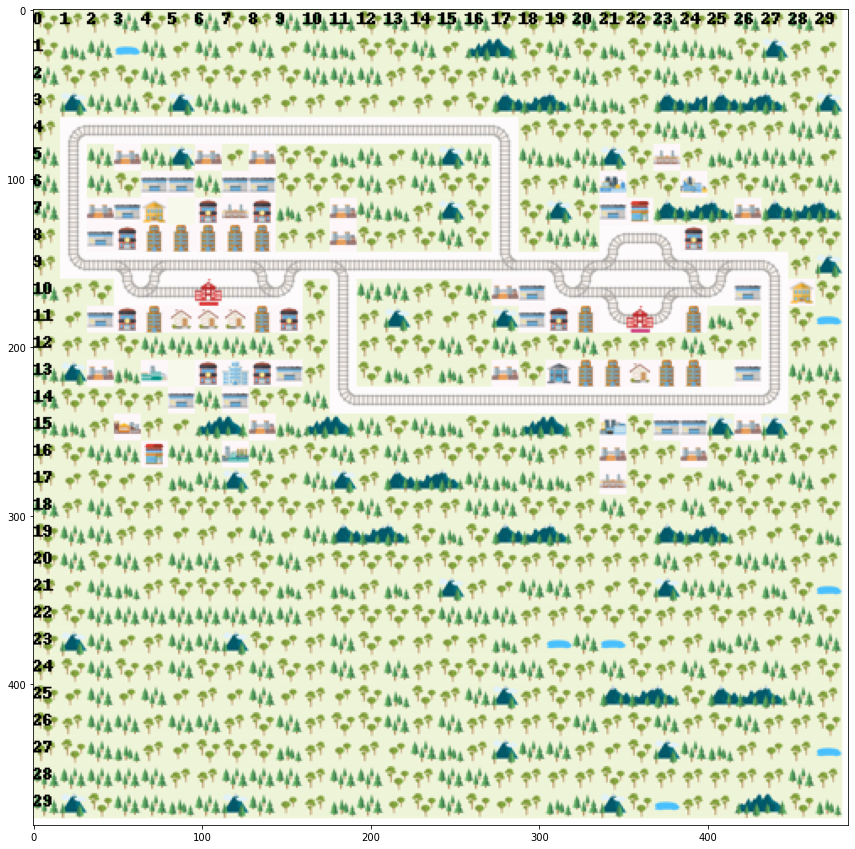

In [212]:
import matplotlib.pyplot as plt
axs = plt.subplots(1, 1, figsize=(15, 15))
plt.imshow(env.render(show_rowcols=True, show=False))

In [213]:
env.get_valid_directions_on_grid(4, 1)

[True, False, False, True]

In [215]:
env.rail.get_transitions(4, 1, 0) # Porbability of transition from cell depending on orientation ??

(0, 1, 0, 0)

In [157]:
list(env.rail.transitions.get_direction_enum())
# env.rail.get_full_transitions(16, 8)

[<Grid4TransitionsEnum.NORTH: 0>,
 <Grid4TransitionsEnum.EAST: 1>,
 <Grid4TransitionsEnum.SOUTH: 2>,
 <Grid4TransitionsEnum.WEST: 3>]

# Global observation

[Read more here](https://flatland.aicrowd.com/environment/observations.html#global-observation)

In [217]:
transition_maps, agent_states, agent_targets = observations[train_1.handle]

In [159]:
# 
transition_maps.shape

(30, 30, 16)

In [160]:
agent_states.shape

(30, 30, 5)

In [161]:
agent_targets.shape

(30, 30, 2)

# Tree observations

[Read more here](https://flatland.aicrowd.com/environment/observations.html?highlight=tree#tree-observation)

In [178]:
from flatland.envs.observations import TreeObsForRailEnv
env_with_tree_obs = RailEnv(width=30, height=30, obs_builder_object=TreeObsForRailEnv(max_depth=10))
obs, info = env_with_tree_obs.reset()


In [193]:
train_1_tree = obs[train_1.handle]

In [194]:
train_1_tree.childs.keys()

dict_keys(['L', 'F', 'R', 'B'])

# Timetables

[Read here](https://flatland.aicrowd.com/environment/timetables.html)

In [186]:
train_1, train_2 = env.agents

In [197]:
train_1.state_machine


                  state: TrainState.WAITING      previous_state None 
                  st_signals: StateTransitionSignals(in_malfunction=False, malfunction_counter_complete=False, earliest_departure_reached=False, stop_action_given=False, valid_movement_action_given=False, target_reached=False, movement_conflict=False)

# Useful links

[Challenge description](https://www.aicrowd.com/challenges/flatland-challenge)

[Observations definition](https://gitlab.aicrowd.com/flatland/flatland/blob/master/flatland/envs/observations.py)

[Env refenrence](http://flatland-rl-docs.s3-website.eu-central-1.amazonaws.com/flatland.envs.rail_env.html?highlight=flatland%20envs%20rail_env%20railenv#flatland.envs.rail_env.RailEnv)